In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sdgym import load_dataset
from data_utils import prepare_test_train
from evaluation import binary_classification
from data_utils import minority_data_undersample
from data_utils import ctgan_syntesize
from data_utils import label_column

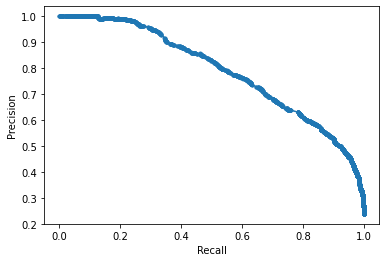

In [7]:
train, test, meta, cat, ord = load_dataset('adult', benchmark=True)
train_x, train_y, test_x, test_y = prepare_test_train(train, test, meta)
performance = binary_classification(train_x, train_y, test_x, test_y)
prec, recall = performance[1]['precision'], performance[1]['recall']
plt.plot(recall, prec, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

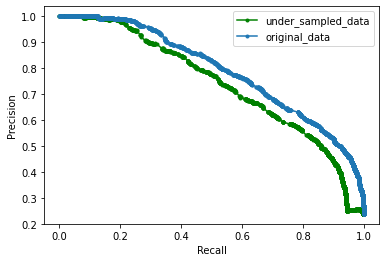

In [8]:
train1 = minority_data_undersample(train, meta, 0.01)
train1_x, train1_y, _, _= prepare_test_train(train1, test, meta)
performance1 = binary_classification(train1_x, train1_y, test_x, test_y)
prec1, recall1= performance1[1]['precision'], performance1[1]['recall']
plt.plot(recall1, prec1, marker='.', color='green', label="under_sampled_data")
plt.plot(recall, prec, marker='.', label="original_data")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

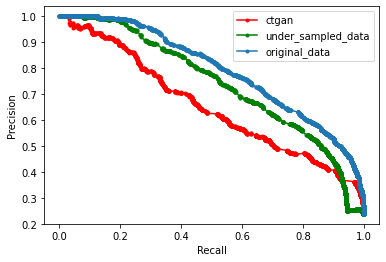

In [9]:
syntesized_data = ctgan_syntesize(train1, cat, ord)
labels = label_column(syntesized_data, meta)
oversampled_minority = syntesized_data[labels==1]
train2 = np.concatenate([train1, oversampled_minority])
train2_x, train2_y, _, _= prepare_test_train(train2, test, meta)
performance2 = binary_classification(train2_x, train2_y, test_x, test_y)
prec2, recall2= performance2[1]['precision'], performance2[1]['recall']
plt.plot(recall2, prec2, marker='.', color='red', label="ctgan")
plt.plot(recall1, prec1, marker='.', color='green', label="under_sampled_data")
plt.plot(recall, prec, marker='.', label="original_data")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()